In [1]:
# packages versions
#!pip freeze
#!cat /proc/cpuinfo
#!free -m
#!df -h
#!nvidia-smi
!ps
#!kill 11164

Mon Jul 16 17:09:25 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.81                 Driver Version: 384.81                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 750     Off  | 00000000:01:00.0 Off |                  N/A |
| 33%   30C    P8     1W /  38W |     32MiB /  2000MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla K40c          Off  | 00000000:02:00.0 Off |                    0 |
| 23%   40C    P0    61W / 235W |    119MiB / 11439MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        

In [ ]:
# list solutions folder
!ls ./results/ -la
!date

In [2]:
# nvidia-smi command
import time
from IPython.display import clear_output
while True:
    !nvidia-smi
    time.sleep(1)
    print(clear_output())

None
Mon Jul 16 17:10:00 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.81                 Driver Version: 384.81                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 750     Off  | 00000000:01:00.0 Off |                  N/A |
| 33%   30C    P8     1W /  38W |     32MiB /  2000MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla K40c          Off  | 00000000:02:00.0 Off |                    0 |
| 23%   43C    P0    61W / 235W |    119MiB / 11439MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
   

KeyboardInterrupt: 

## Test model

In [2]:
import os, cv2
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# keras imports
import keras
import keras.backend as K
from utils.create_model import create_VGG, create_MobileNet, create_Inception
from utils.data_utils import load_ava, clean_data
from utils.score_utils import mean_score, std_score
from utils.BatchGenerator import BatchCreator, BatchSequence

# model selection
from sklearn.model_selection import train_test_split

# allow memmory dynamic memmory allocation
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.Session(config=config)
set_session(sess)  # set this TensorFlow session as the default session for Keras

# random seed to make the kernel reproducible
random_seed = 123456789
np.random.seed(random_seed)

Using TensorFlow backend.


In [ ]:
# files = os.listdir('./real_images/')
# files = np.array(files)
# print(files.shape)
# selected = np.array(['DSC_0002.JPG', 'DSC_0158.JPG', 'DSC_0711.JPG', 'DSC_0449.JPG',
#                      'DSC_0142.JPG', 'DSC_0239.JPG', 'DSC_0096.JPG', 'DSC_0401.JPG',
#                      'DSC_0184.JPG', 'DSC_0169.JPG', 'DSC_0122.JPG', 'DSC_0741.JPG'])
# print(selected.shape)
# files = files[np.logical_not(np.isin(files, selected))]
# print(files.shape)

# for file in files:
#     os.remove(os.path.join('./real_images/', file))

In [ ]:
files = os.listdir('./real_images/')
files = np.array(files)
images = []
# load the images into memmory
for file in files:
    image = cv2.resize(cv2.cvtColor(cv2.imread(os.path.join('./real_images/', file), 1), cv2.COLOR_BGR2RGB), (224, 224))/255
    images.append(image)

# convert list into numpy array
images = np.array(images)

In [ ]:
# mean_scores_inc = [mean_score(pred) for pred in y_pred_inc]
# stds_scores_inc = [std_score(pred) for pred in y_pred_inc]

# plt.figure(figsize=(40, 40))
# for i in range(len(images)):
    
#     # open image with opencv and visualize it
#     ax = plt.subplot(4, 4, i+1)
#     plt.imshow(images[i], aspect = 'auto')
#     text = 'Inception: {} ({}{})\n'.format(round(mean_scores_inc[i], 3), chr(177), round(stds_scores_inc[i], 3))
#     plt.subplots_adjust(hspace=0.35)
#     plt.text(0.5, -0.2, text, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize = 26)
#     plt.axis('off')
    
# #plt.savefig('real_examples.png')
# plt.show()

In [ ]:
# ---------------------
model_name = 'inception'
model = create_Inception()
    
model.load_weights('./results/best_model_{}.h5'.format(model_name))
y_pred_inc = model.predict(images)
K.clear_session()

# ---------------------
model_name = 'vgg_16'
model = create_VGG()

model.load_weights('./results/best_model_{}.h5'.format(model_name))
y_pred_vgg = model.predict(images)
K.clear_session()

# ---------------------
model_name = 'mobilenet'
model = create_MobileNet()
model.load_weights('./results/best_model_{}.h5'.format(model_name))
y_pred_mobile = model.predict(images)
K.clear_session()

In [ ]:
mean_scores_inc = [mean_score(pred) for pred in y_pred_inc]
stds_scores_inc = [std_score(pred) for pred in y_pred_inc]

mean_scores_vgg = [mean_score(pred) for pred in y_pred_vgg]
stds_scores_vgg = [std_score(pred) for pred in y_pred_vgg]

mean_scores_mobile = [mean_score(pred) for pred in y_pred_mobile]
stds_scores_mobile = [std_score(pred) for pred in y_pred_mobile]

# mean_scores = np.array(mean_scores)
# g7 = np.where(mean_scores < 4.2)
# print(np.array(files)[g7])

In [ ]:
images = []
# load the images into memmory
for file in files:
    image = cv2.cvtColor(cv2.imread(os.path.join('./2018-04-13', file), 1), cv2.COLOR_BGR2RGB)/255
    images.append(image)

# convert list into numpy array
images = np.array(images)

plt.figure(figsize=(40, 40))
for i in range(len(images)):
    
    # open image with opencv and visualize it
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(images[i], aspect = 'auto')
    text = 'Inception: {} ({}{})\n'.format(round(mean_scores_inc[i], 3), chr(177), round(stds_scores_inc[i], 3))
    text += 'VGG16: {} ({}{})\n'.format(round(mean_scores_vgg[i], 3), chr(177), round(stds_scores_vgg[i], 3))
    text += 'MobileNet: {} ({}{})\n'.format(round(mean_scores_mobile[i], 3), chr(177), round(stds_scores_mobile[i], 3))
    plt.subplots_adjust(hspace=0.35)
    plt.text(0.5, -0.2, text, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize = 26)
    plt.axis('off')
    
plt.savefig('real_examples.png')
plt.show()

In [3]:
# directory where we are going to work on
workdir = '/home/frubio/AVA/'

# annotations and images directories
train_dir_annotations = os.path.join(workdir, 'AVA_dataset')
train_dir_images = os.path.join(workdir, 'AVA_images')

In [4]:
# load and clean the dataset
x_train, y_train = load_ava(train_dir_annotations)
x_train, y_train = clean_data(train_dir_images, x_train, y_train)

Total images lost:  178
Original dataset shape:  (255530,)
Resulting dataset shape:  (255352,)


In [5]:
# split train and validationy_train
x_train, x_validation, y_train, y_validation = train_test_split(x_train, 
                                                                y_train, 
                                                                test_size = 0.2,
                                                                random_state = random_seed)

In [6]:
validation_gen = BatchSequence(x_validation, y_validation, 100, train_dir_images)

PatchSequence: 51071 patch samples.


In [7]:
# # ---------------------
# model_name = 'inception'
# model = create_Inception()
    
# model.load_weights('./results/best_model_{}.h5'.format(model_name))
# y_pred_inc = model.predict(images)
# K.clear_session()

# # ---------------------
# model_name = 'vgg_16'
# model = create_VGG()

# model.load_weights('./results/best_model_{}.h5'.format(model_name))
# y_pred_vgg = model.predict(images)
# K.clear_session()

# ---------------------
model_name = 'mobilenet'
model = create_MobileNet()
model.load_weights('./results/best_model_{}.h5'.format(model_name))
y_pred_mob = model.predict_generator(validation_gen,
                                 verbose = 1,
                                 workers = 4,
                                 use_multiprocessing = True)
K.clear_session()

511/511 [==============================] - 802s 2s/step


In [ ]:
# y_pred = model.predict_generator(validation_gen,
#                                  verbose = 1,
#                                  workers = 4,
#                                  use_multiprocessing = True)

In [8]:
y_true = validation_gen.imgs_rates

In [10]:
y_pred = y_pred_mob

In [ ]:
print(mean_scores.shape)
print(mean_scores_pred.shape)

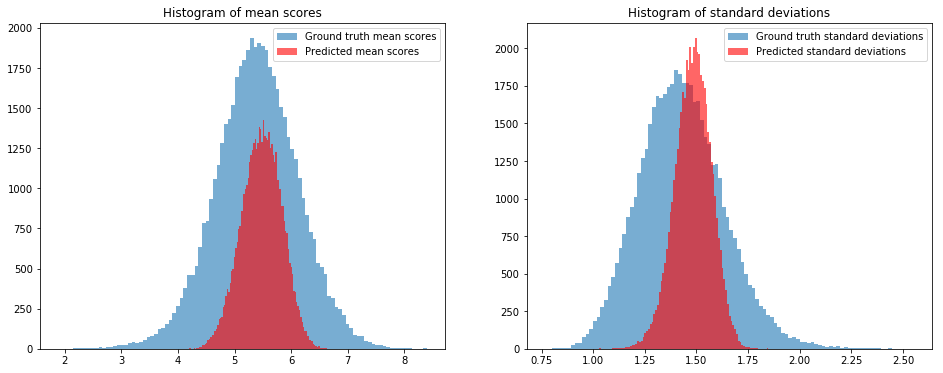

In [34]:
# metrics regarding score distribution
mean_scores = np.sum(y_true * np.arange(1, 11), axis = 1) / (np.sum(y_true, axis = 1))
mean_scores_rep = np.repeat(mean_scores, 10, axis = 0).reshape(len(y_true), 10)
stds_scores = np.sqrt((np.sum(np.abs(np.arange(1, 11) - mean_scores_rep) ** 2 * y_true, axis = 1)) / (np.sum(y_true, axis = 1)))

mean_scores_pred = np.sum(y_pred * np.arange(1, 11), axis = 1)
mean_scores_rep_pred = np.repeat(mean_scores_pred, 10, axis = 0).reshape(len(y_true), 10)
stds_scores_pred = np.sqrt((np.sum(np.abs(np.arange(1, 11) - mean_scores_rep_pred) ** 2 * y_pred, axis = 1)))

# rating distribution mean over all the dataset
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.title('Histogram of mean scores')
plt.hist(mean_scores, bins = 100, alpha = 0.6, label = 'Ground truth mean scores')
plt.hist(mean_scores_pred, bins = 100, color = 'r', alpha = 0.6, label = 'Predicted mean scores')
plt.legend()
plt.subplot(1, 2, 2)
plt.title('Histogram of standard deviations')
plt.hist(stds_scores, bins = 100, alpha = 0.6, label = 'Ground truth standard deviations')
plt.hist(stds_scores_pred, bins = 100, color = 'r', alpha = 0.6, label = 'Predicted standard deviations')
plt.legend()
plt.savefig('inception.png')
plt.show()

In [ ]:
print(y_true.shape)

In [ ]:
# set the number of images to pick
n_images = 5

# pick n_images randomly and load them into memory
image_idxs = np.random.choice(np.arange(len(x_validation)), n_images, replace = False)

images = []
# load the images into memory
for i in range(n_images):
    case = os.path.join(train_dir_images, str(x_validation[image_idxs[i]]) + '.jpg')
    image = cv2.resize(cv2.cvtColor(cv2.imread(case, 1), cv2.COLOR_BGR2RGB), (224, 224))/255
    images.append(image)

# get the predictions
images = np.array(images)
y_pred = model.predict(images).squeeze()
y_true = y_validation[image_idxs]

# plot the results
for i in range(n_images):
    plt.figure(figsize=(12, 12))
    plt.subplot(2, 3, 1)
    plt.imshow(images[i])
    plt.subplot(2, 3, 2)
    y_true_norm = y_true[i] / np.sum(y_true[i])
    plt.bar(np.arange(1,11), height = y_true_norm)
    plt.subplot(2, 3, 3)
    y_pred_norm = y_pred[i]
    plt.bar(np.arange(1,11), height = y_pred_norm)
    plt.show()
    print('Real Score: {} ({}{})'.format(round(mean_score(y_true_norm), 3), chr(177), round(std_score(y_true_norm), 3)))
    print('Pred Score: {} ({}{})'.format(round(mean_score(y_pred_norm), 3), chr(177), round(std_score(y_pred_norm), 3)))